In [1]:
import pandas as pd

df = pd.read_csv("995K_subset.csv", dtype={0: str, 1: str})

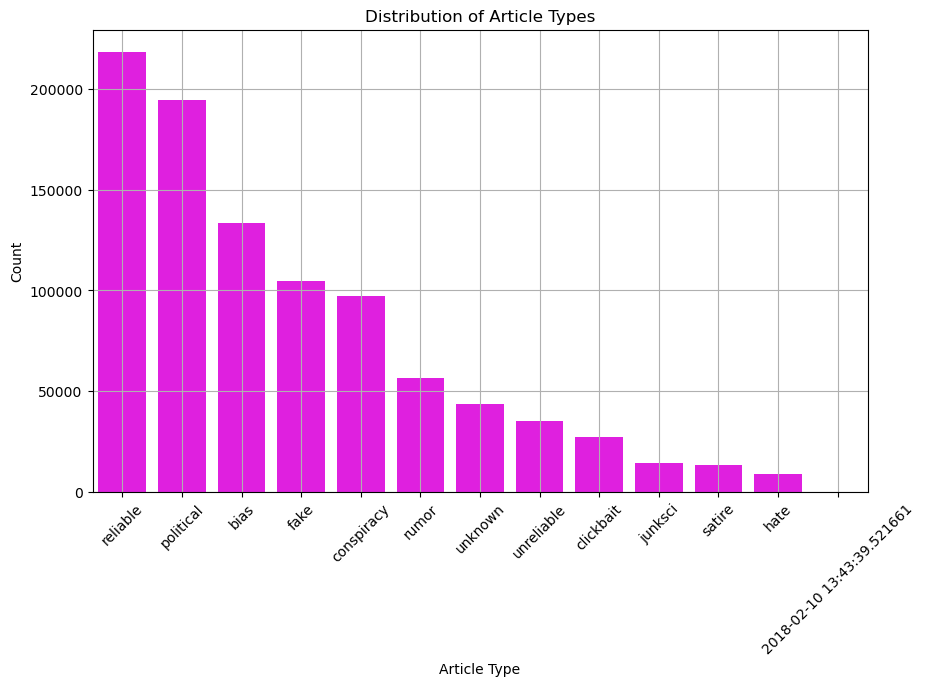

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

type_counts = df['type'].value_counts()

type_order = type_counts.index

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=type_order, color='fuchsia')

plt.title("Distribution of Article Types")
plt.xlabel("Article Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

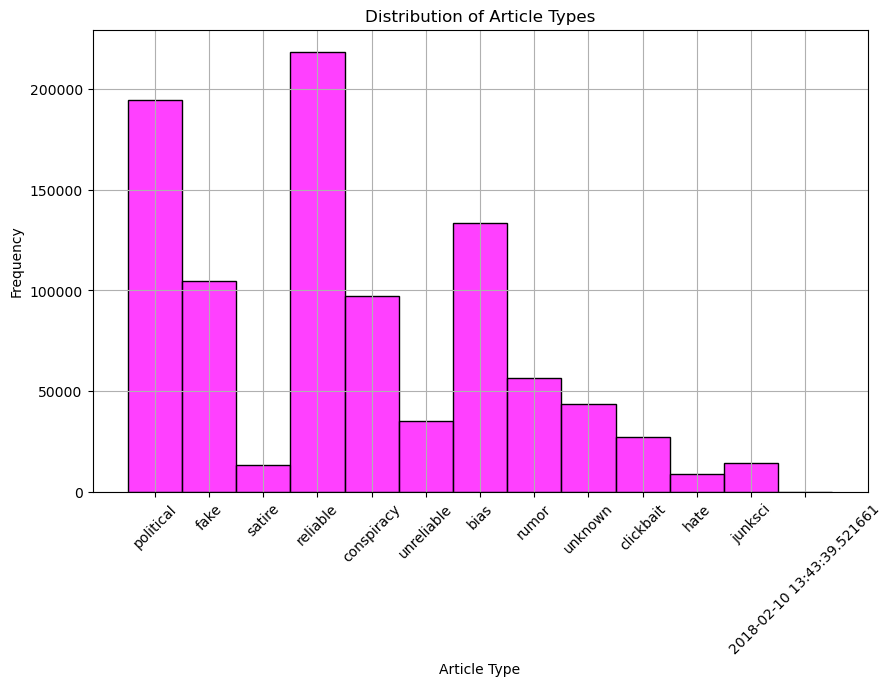

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

type_counts = df['type'].value_counts()

type_order = type_counts.index

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='type', color='fuchsia')
plt.title("Distribution of Article Types")
plt.xlabel("Article Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0               1
id                       7
domain                  11
type                 47786
url                     11
content                 12
scraped_at              13
inserted_at             13
updated_at              13
title                 8606
authors             442757
keywords            995000
meta_keywords        38790
meta_description    525106
tags                764081
summary             995000
source              780078
dtype: int64


In [ ]:
import pandas as pd

# Check the data types and missing values
print(df.info())

# Observation 1: Distribution of Article Types
article_type_counts = df['type'].value_counts()
print("Distribution of Article Types:")
print(article_type_counts)

# Observation 2: Temporal Patterns in Article Publication
# Convert 'inserted_at' column to datetime format
df['inserted_at'] = pd.to_datetime(df['inserted_at'], errors='coerce')
# Extract year and month from the 'inserted_at' column
df['publication_year'] = df['inserted_at'].dt.year
df['publication_month'] = df['inserted_at'].dt.month
# Count the number of articles published each month
monthly_publications = df.groupby(['publication_year', 'publication_month']).size()
print("Monthly Publication Frequency:")
print(monthly_publications)

# Observation 3: Keyword Analysis Across Domains
# Check for missing values in the 'keywords' column
print("Number of missing values in 'keywords' column:", df['keywords'].isnull().sum())
# Fill missing values with empty string
df['keywords'] = df['keywords'].fillna('')
# Split keywords by comma and count frequency
keywords = df['keywords'].str.split(',').explode().str.strip()
keyword_counts = keywords.value_counts()
print("Top 10 Most Frequent Keywords:")
print(keyword_counts.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995000 entries, 0 to 994999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        994999 non-null  object 
 1   id                994993 non-null  object 
 2   domain            994989 non-null  object 
 3   type              947214 non-null  object 
 4   url               994989 non-null  object 
 5   content           994988 non-null  object 
 6   scraped_at        994987 non-null  object 
 7   inserted_at       994987 non-null  object 
 8   updated_at        994987 non-null  object 
 9   title             986394 non-null  object 
 10  authors           552243 non-null  object 
 11  keywords          0 non-null       float64
 12  meta_keywords     956210 non-null  object 
 13  meta_description  469894 non-null  object 
 14  tags              230919 non-null  object 
 15  summary           0 non-null       float64
 16  source            21

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import re

# Observation 1: Counting the number of URLs in the content
df['url_count'] = df['content'].str.count(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
total_url_count = df['url_count'].sum()
print("Total number of URLs in the content:", total_url_count)

# Observation 2: Counting the number of dates in the content
date_count = df['content'].str.count(r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b')  # Assuming date format is DD/MM/YYYY or MM/DD/YYYY
total_date_count = date_count.sum()
print("Total number of dates in the content:", total_date_count)

# Observation 3: Determining the 100 most frequent words that appear in the content
all_content = ' '.join(df['content'].astype(str))
words = word_tokenize(all_content.lower())
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(100)
print("100 Most Frequent Words in the Content:")
print(most_common_words)

# Observation 4: Plot the frequency of the 10000 most frequent words
top_10000_words = word_counts.most_common(10000)
word_freq_dict = dict(top_10000_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of the 10000 Most Frequent Words')
plt.show()

Total number of URLs in the content: 215606.0


: 

Top 100 Most Frequent Words:
[('one', 461), ('like', 407), ('time', 392), ('peopl', 386), ('state', 365), ('trump', 348), ('would', 323), ('use', 322), ('market', 295), ('us', 282), ('year', 279), ('also', 276), ('new', 270), ('blockchain', 260), ('make', 258), ('thing', 233), ('think', 233), ('said', 232), ('go', 232), ('mani', 227), ('way', 226), ('report', 225), ('govern', 223), ('even', 215), ('nation', 213), ('take', 212), ('next', 212), ('get', 211), ('http', 209), ('could', 206), ('see', 203), ('presid', 202), ('work', 189), ('stock', 188), ('say', 188), ('american', 186), ('two', 185), ('may', 184), ('need', 183), ('world', 183), ('first', 180), ('right', 177), ('day', 175), ('life', 174), ('power', 171), ('want', 169), ('look', 164), ('help', 156), ('come', 155), ('countri', 153), ('includ', 152), ('bitcoin', 151), ('feel', 151), ('fact', 148), ('war', 148), ('person', 147), ('bank', 146), ('obama', 145), ('good', 144), ('search', 143), ('well', 143), ('back', 142), ('headlin'

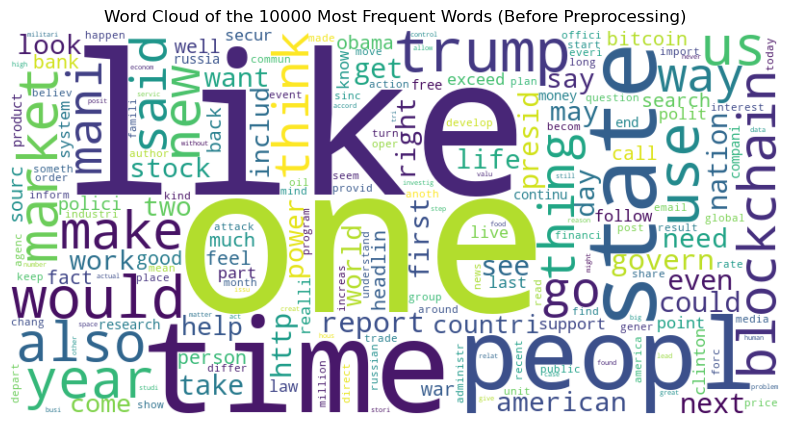

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import re

# Tokenize the text and count the frequency of each word
all_content = ' '.join(df['content'].astype(str))
words = word_tokenize(all_content.lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and word.isalpha()]

# Apply stemming
porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in filtered_words]

# Select the top 100 most frequent words
word_counts = Counter(stemmed_words)
top_100_words = word_counts.most_common(100)
print("Top 100 Most Frequent Words:")
print(top_100_words)

# Select the top 10,000 most frequent words
top_10000_words = word_counts.most_common(10000)

# Plot the frequency distribution of the 10000 most frequent words
word_freq_dict = dict(top_10000_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of the 10000 Most Frequent Words (Before Preprocessing)')
plt.show()

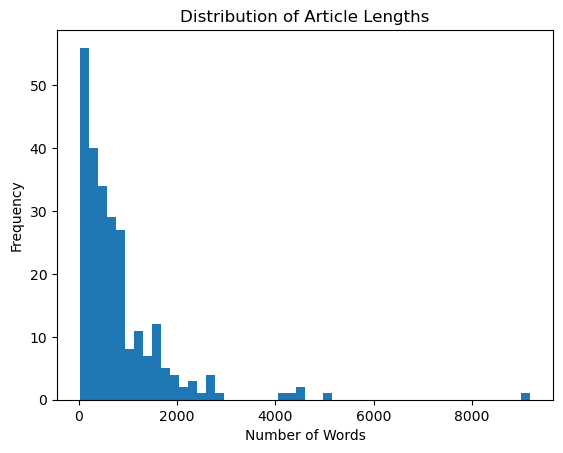

In [ ]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Observation 1: Distribution of Article Lengths
article_lengths = df['content'].apply(lambda x: len(word_tokenize(str(x))))
plt.hist(article_lengths, bins=50)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Observation 3: Semantic Analysis of Article Titles
all_titles = ' '.join(df['title'].astype(str))
words = word_tokenize(all_titles.lower())
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(100)
print("100 Most Common Words in Article Titles:")
print(most_common_words)

100 Most Common Words in Article Titles:
[(',', 55), (':', 54), ('’', 35), ('trump', 24), ('–', 21), ('(', 15), (')', 15), ('new', 13), ('?', 13), ('‘', 11), ('&', 11), ("'", 11), ('“', 9), ('president', 9), ('video', 8), ('”', 8), ("'s", 8), ('!', 7), ('market', 7), ('analysis', 7), ('war', 6), ('.', 6), ('obama', 6), ('us', 6), ('report', 5), ('cancer', 5), ('time', 5), ('part', 5), ('2018', 5), ('russia', 5), ('$', 5), ('really', 4), ('key', 4), ('news', 4), ('donald', 4), ('says', 4), ('4', 4), ('work', 4), ('could', 4), ('illegal', 4), ('big', 4), ('see', 4), ('god', 4), ('industry', 4), ('world', 4), ('2016', 4), ('—', 4), ('free', 4), ('get', 4), ('global', 4), ('never', 3), ('-', 3), ('first', 3), ('times', 3), ('black', 3), ('canada', 3), ('attack', 3), ('senate', 3), ('prepare', 3), ('north', 3), ('america', 3), ('tax', 3), ('going', 3), ('story', 3), ('nation', 3), ('reason', 3), ('long', 3), ('syria', 3), ('u.s.', 3), ('isis', 3), ('state', 3), ('government', 3), ('fed', 3)

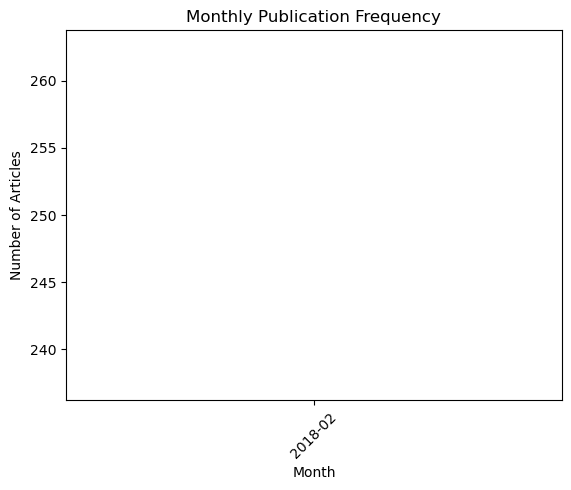

In [ ]:
# Convert 'inserted_at' column to datetime
df['inserted_at'] = pd.to_datetime(df['inserted_at'])

# Extract year and month from 'inserted_at' column
df['inserted_month'] = df['inserted_at'].dt.to_period('M')

# Group by month and count the number of articles
monthly_publications = df.groupby('inserted_month').size()

# Plotting
plt.plot(monthly_publications.index.astype(str), monthly_publications.values)
plt.title('Monthly Publication Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()